In [1]:
# 测试PaddleOCR 3.x 正确API
from paddleocr import PaddleOCR

print("正在初始化PaddleOCR...")
ocr = PaddleOCR(
    lang='ch',
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)
print("✓ PaddleOCR初始化成功!")

c:\Users\Quenton\Documents\Github\writtingOCR\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


正在初始化PaddleOCR...


c:\Users\Quenton\Documents\Github\writtingOCR\venv\lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.
Creating model:

✓ PaddleOCR初始化成功!


In [2]:
# 环境设置
import sys
from pathlib import Path

# 添加src到路径
project_root = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
sys.path.insert(0, str(project_root / 'src'))

print(f"项目根目录: {project_root}")

项目根目录: c:\Users\Quenton\Documents\Github\writtingOCR


## 1. 加载测试样本

从samples目录选择2-3份作文进行详细测试

In [3]:
# 查看可用样本
samples_dir = project_root / 'data' / 'samples'

# 列出所有样本文件夹
sample_folders = [d for d in samples_dir.iterdir() if d.is_dir()]

print(f"找到 {len(sample_folders)} 个样本文件夹:")
for folder in sample_folders:
    images = list(folder.glob('*.png'))
    print(f"  - {folder.name}: {len(images)} 张图片")

找到 2 个样本文件夹:
  - 2022 第2題 (冬奧) (8份)_Original: 8 张图片
  - 2023 第2題 (藝術節) (13份)_Original: 16 张图片


In [4]:
# 选择测试图片
test_images = []

# 从每个文件夹选1-2张
for folder in sample_folders[:2]:  # 只取前2个文件夹
    images = sorted(folder.glob('*.png'))[:2]  # 每个文件夹取2张
    test_images.extend(images)

print(f"\n选择 {len(test_images)} 张图片进行测试:")
for img in test_images:
    print(f"  - {img.parent.name}/{img.name}")


选择 4 张图片进行测试:
  - 2022 第2題 (冬奧) (8份)_Original/sample_001.png
  - 2022 第2題 (冬奧) (8份)_Original/sample_002.png
  - 2023 第2題 (藝術節) (13份)_Original/sample_001.png
  - 2023 第2題 (藝術節) (13份)_Original/sample_002.png


In [5]:
print(test_images)

[WindowsPath('c:/Users/Quenton/Documents/Github/writtingOCR/data/samples/2022 第2題 (冬奧) (8份)_Original/sample_001.png'), WindowsPath('c:/Users/Quenton/Documents/Github/writtingOCR/data/samples/2022 第2題 (冬奧) (8份)_Original/sample_002.png'), WindowsPath('c:/Users/Quenton/Documents/Github/writtingOCR/data/samples/2023 第2題 (藝術節) (13份)_Original/sample_001.png'), WindowsPath('c:/Users/Quenton/Documents/Github/writtingOCR/data/samples/2023 第2題 (藝術節) (13份)_Original/sample_002.png')]


## 2. 初始化OCR识别器

使用PaddleOCR进行手写中文识别

## 3. 单张图片测试

详细分析第一张图片的识别效果

In [ ]:
from paddleocr import PaddleOCR

# 初始化 PaddleOCR 实例 (首次运行会自动下载模型)
ocr = PaddleOCR(
    lang='ch',
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)

# 选择第一张图片
test_image = test_images[0]
print(f"测试图片: {test_image}")

# 执行 OCR 推理 
result = ocr.predict(input=str(test_image))

# 提取识别结果
res = result[0]
print(f"\n识别到 {len(res['rec_texts'])} 个文字区域")
print("\n前10个识别结果:")
for i, (text, score) in enumerate(zip(res['rec_texts'][:10], res['rec_scores'][:10])):
    print(f"{i+1}. 文字: '{text}', 置信度: {score:.3f}")

Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.
Resized image size (7014x2480) exceeds max_side_limit of 4000. Resizing to fit within limit.
Resized image size (7014x2480) exceeds max_side_limit of 4000. Resizing to fit within limit.


测试图片: c:\Users\Quenton\Documents\Github\writtingOCR\data\samples\2022 第2題 (冬奧) (8份)_Original\sample_001.png


{'res': {'input_path': 'c:\\Users\\Quenton\\Documents\\Github\\writtingOCR\\data\\samples\\2022 第2題 (冬奧) (8份)_Original\\sample_001.png', 'page_index': None, 'model_settings': {'use_doc_preprocessor': False, 'use_textline_orientation': False}, 'dt_polys': array([[[2107,   57],
        ...,
        [2111,  119]],

       ...,

       [[1226, 6821],
        ...,
        [1226, 6863]]], shape=(129, 4, 2), dtype=int16), 'text_det_params': {'limit_side_len': 64, 'limit_type': 'min', 'thresh': 0.3, 'max_side_limit': 4000, 'box_thresh': 0.6, 'unclip_ratio': 1.5}, 'text_type': 'general', 'textline_orientation_angles': array([-1, ..., -1], shape=(129,)), 'text_rec_score_thresh': 0.0, 'return_word_box': False, 'rec_texts': ['座位號：006', '日期：二零二二年三月一日', '嶺南大學中國語文教學與測試中心', '標题：给你的信', '5.0', '2022 年度中國語文能力測試 書面語考試', '答题纸 (2022.05.23)', '', '/50', '60.寫作', '《给你的信》', '親', '爱', '的', '你', '你好', '首', '先', '請', '自己', '俗', '氣致歡', '我為', '畢', '竞', '我俩', '素', '容', '許', '未', '谋', '的', '面', '0', '實', '易', '不出', '

## 4. 提取纯文本

将识别结果按行组织并提取纯文本

In [14]:
# 提取纯文本
print("\n识别的文本内容:")
print("=" * 60)
full_text = ' '.join(res['rec_texts'])
print(full_text)
print("=" * 60)
print(f"\n总字符数: {len(res['rec_texts'])}")
print(f"平均置信度: {sum(res['rec_scores']) / len(res['rec_scores']):.3f}")


识别的文本内容:
座位號：006 日期：二零二二年三月一日 嶺南大學中國語文教學與測試中心 標题：给你的信 5.0 2022 年度中國語文能力測試 書面語考試 答题纸 (2022.05.23)  /50 60.寫作 《给你的信》 親 爱 的 你 你好 首 先 請 自己 俗 氣致歡 我為 畢 竞 我俩 素 容 許 未 谋 的 面 0 實 易 不出 些 精 ，再 加 在 妙 絕倫又討好非常的句子 唯有難為 你頂 着 這 俗 100 氣難當的勢頭繼續閱讀下去。 你或許會問甚麼稱你你。正如我所說 ，我們素未謀面，我甚至連你叫甚麼我也不知 。只是在看完冬奥谓雪比署後，忽然有感，便 200 熟络起来的。 這年的冬奥以往無大差别，卻又似有不 同。相同在於依舊難纏的對手，不同在於又多 了幾名倔强的青年乘风破浪，勇敢直前，為挑 我不可能而戰。先不要急着反，竟自事實 300 看来確實像是不可能。但在這樣的情说下，他 们没有放案，没有氣馁，依然為取得好成績而 奮身前進。難道這種勇氣不值得我們看到嗎？ 他們的年纪，他們的經或許不容許他們比肩 戰沙場的老練選手，可他們不以初出茅虚而 百 400 化 相和 妄 菲 车 自  热 少 血的不畏不懼，而他们她骋的模樣也刻在香 港人的心底。儘管成績單不好看，但纪對是香 港人的傲。我相信 你同樣為他們驕微，受他们抛開 500 好成績 且成為他們之中 r 的枷锁的血染 重 股数血与之 不然你也看不见我 的信 的 员 一  實在難以忘記在家中觀賽時選手擔憂 的 以及為落欺而惋惜的嘆息。我们 句. 真情 不 约 白 1 而同地说着 下次加油 「下次再来等 等 600 唯獨没有理怨，因着我們知道這次 激勵的話 已是香港體壇的一大步香港體壇的才來 一定 是光明的。而締适光明未来的你們，會是我們 心底最深處，無法替化的驕傲。 你或許會遇到許多团難一如你師兄師姐 700 那般深陷彷無助的迷津中。但你要切記，只 要堅信奇跡，你就是一個有跡。 我是應该要感激你的附出的：為自己為 體壇、為冬奥為香港。就此搁筆，道祝你前 程锦翩。 800 支持你的香港人上 900 1000 1100 1200 一全卷完一 2

总字符数: 129
平均置信度: 0.807


## 5. 批量测试

对所有测试图片进行批量识别

In [15]:
# 批量识别统计
all_results = []

print("批量识别测试图片...\n")
for img_path in test_images:
    result = ocr.predict(input=str(img_path))
    res = result[0]
    
    num_chars = len(res['rec_texts'])
    avg_conf = sum(res['rec_scores']) / num_chars if num_chars > 0 else 0
    
    all_results.append({
        'image': img_path.name,
        'num_chars': num_chars,
        'avg_confidence': avg_conf,
        'min_confidence': min(res['rec_scores']) if num_chars > 0 else 0,
        'texts': res['rec_texts'],
        'scores': res['rec_scores']
    })
    print(f"✓ {img_path.name}: {num_chars} 个字符, 平均置信度 {avg_conf:.3f}")

批量识别测试图片...



Resized image size (7014x2480) exceeds max_side_limit of 4000. Resizing to fit within limit.
Resized image size (7014x2480) exceeds max_side_limit of 4000. Resizing to fit within limit.
Resized image size (7014x2480) exceeds max_side_limit of 4000. Resizing to fit within limit.


✓ sample_001.png: 129 个字符, 平均置信度 0.807


Resized image size (7014x2480) exceeds max_side_limit of 4000. Resizing to fit within limit.


✓ sample_002.png: 6 个字符, 平均置信度 0.818


Resized image size (7014x2480) exceeds max_side_limit of 4000. Resizing to fit within limit.


✓ sample_001.png: 4 个字符, 平均置信度 0.967
✓ sample_002.png: 4 个字符, 平均置信度 0.986
✓ sample_002.png: 4 个字符, 平均置信度 0.986


## 6. 统计分析

In [16]:
# 统计信息
total_chars = sum(r['num_chars'] for r in all_results)
avg_confidence_all = sum(r['avg_confidence'] * r['num_chars'] for r in all_results) / total_chars if total_chars > 0 else 0

print("\n" + "=" * 60)
print("OCR基准测试统计")
print("=" * 60)
print(f"测试图片数: {len(test_images)}")
print(f"识别字符总数: {total_chars}")
print(f"平均每张图片: {total_chars / len(test_images):.1f} 个字符")
print(f"整体平均置信度: {avg_confidence_all:.3f}")
print("=" * 60)


OCR基准测试统计
测试图片数: 4
识别字符总数: 143
平均每张图片: 35.8 个字符
整体平均置信度: 0.817


In [ ]:
# 置信度分布
import numpy as np
import matplotlib.pyplot as plt

all_confidences = []
for r in all_results:
    all_confidences.extend(r['scores'])

plt.figure(figsize=(10, 6))
plt.hist(all_confidences, bins=20, edgecolor='black')
plt.xlabel('置信度')
plt.ylabel('字符数量')
plt.title('OCR识别置信度分布')
plt.axvline(x=np.mean(all_confidences), color='r', linestyle='--', label=f'平均值: {np.mean(all_confidences):.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n置信度 < 0.7 的字符占比: {sum(1 for c in all_confidences if c < 0.7) / len(all_confidences) * 100:.1f}%")
print(f"置信度 < 0.5 的字符占比: {sum(1 for c in all_confidences if c < 0.5) / len(all_confidences) * 100:.1f}%")

## 7. 问题分析

记录识别过程中发现的问题

In [ ]:
# 低置信度字符分析
low_confidence_results = []
for r in all_results:
    for text, score in zip(r['texts'], r['scores']):
        if score < 0.7:
            low_confidence_results.append((r['image'], text, score))

print(f"低置信度(<0.7)字符示例 (共 {len(low_confidence_results)} 个):\n")
for img, text, conf in sorted(low_confidence_results, key=lambda x: x[2])[:20]:
    print(f"  图片: {img}, 文字: '{text}', 置信度: {conf:.3f}")

## 8. 结论与下一步

### 观察到的问题
在上面的单元格中手动记录:
1. 格子线是否影响识别?
2. 哪些字符容易识别错?
3. 删除线区域的识别情况如何?
4. 是否有漏检的文字?

### Stage 1 验收标准
- [ ] 整体识别准确率评估完成
- [ ] 格子线影响程度明确
- [ ] 常见错误类型已记录
- [ ] 决策: 是否需要格子线预处理

### 下一步行动
根据测试结果决定:
- 如果准确率 > 85%: 进入 Stage 2(删除线检测)
- 如果准确率 < 85%: 考虑添加预处理步骤

In [ ]:
# 保存测试报告(手动填写)
report = f"""
# Stage 1 OCR基准测试报告

## 测试配置
- 测试图片数: {len(test_images)}
- 识别字符总数: {total_chars}
- 整体平均置信度: {avg_confidence_all:.3f}

## 主要发现
(手动填写观察结果)

1. 格子线影响: 
2. 常见错误:
3. 删除线区域:

## 决策
- [ ] 需要格子线预处理
- [ ] 可以直接进入Stage 2

## 日期
{__import__('datetime').datetime.now().strftime('%Y-%m-%d')}
"""

print(report)

## 9. 生成可视化结果

批量生成所有测试图片的OCR可视化结果，保存到output目录

In [7]:
# 批量生成可视化结果
output_base_dir = project_root / 'output' / 'ocr_visualizations'

print("=" * 60)
print("生成OCR可视化结果")
print("=" * 60)

# 按文件夹分组处理
for folder in sample_folders[:2]:  # 处理前两个文件夹
    folder_name = folder.name
    print(f"\n处理文件夹: {folder_name}")
    
    # 创建对应的输出目录
    output_dir = output_base_dir / folder_name
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # 获取该文件夹下的所有图片
    images = sorted(folder.glob('*.png'))
    
    for i, img_path in enumerate(images, 1):
        print(f"  [{i}/{len(images)}] {img_path.name}...", end=' ')
        
        try:
            # OCR识别
            result = ocr.predict(input=str(img_path))
            
            # 保存可视化结果
            for res in result:
                # 打印识别文本到控制台（可选）
                # res.print()
                
                # 保存可视化图片和JSON
                res.save_to_img(str(output_dir))
                res.save_to_json(str(output_dir))
            
            print("✓")
        except Exception as e:
            print(f"✗ 错误: {e}")

print("\n" + "=" * 60)
print(f"完成! 结果保存在: {output_base_dir}")
print("=" * 60)

生成OCR可视化结果

处理文件夹: 2022 第2題 (冬奧) (8份)_Original
  [1/16] sample_01_01.png... ✓
  [2/16] sample_01_02.png... ✓
  [2/16] sample_01_02.png... ✓
  [3/16] sample_02_01.png... ✓
  [3/16] sample_02_01.png... ✓
  [4/16] sample_02_02.png... ✓
  [4/16] sample_02_02.png... ✓
  [5/16] sample_03_01.png... ✓
  [5/16] sample_03_01.png... ✓
  [6/16] sample_03_02.png... ✓
  [6/16] sample_03_02.png... ✓
  [7/16] sample_04_01.png... ✓
  [7/16] sample_04_01.png... ✓
  [8/16] sample_04_02.png... ✓
  [8/16] sample_04_02.png... ✓
  [9/16] sample_05_01.png... ✓
  [9/16] sample_05_01.png... ✓
  [10/16] sample_05_02.png... ✓
  [10/16] sample_05_02.png... ✓
  [11/16] sample_06_01.png... ✓
  [11/16] sample_06_01.png... ✓
  [12/16] sample_06_02.png... ✓
  [12/16] sample_06_02.png... ✓
  [13/16] sample_07_01.png... ✓
  [13/16] sample_07_01.png... ✓
  [14/16] sample_07_02.png... ✓
  [14/16] sample_07_02.png... ✓
  [15/16] sample_08_01.png... ✓
  [15/16] sample_08_01.png... ✓
  [16/16] sample_08_02.png... ✓
  [16/16] 

In [8]:
# 查看生成的文件
print("\n生成的可视化文件:")
for folder_dir in output_base_dir.iterdir():
    if folder_dir.is_dir():
        files = list(folder_dir.glob('*'))
        print(f"\n{folder_dir.name}/")
        print(f"  - 共 {len(files)} 个文件")
        # 显示前几个文件名
        for f in sorted(files)[:5]:
            print(f"    • {f.name}")
        if len(files) > 5:
            print(f"    ... 还有 {len(files) - 5} 个文件")


生成的可视化文件:

2022 第2題 (冬奧) (8份)_Original/
  - 共 32 个文件
    • sample_01_01_ocr_res_img.png
    • sample_01_01_res.json
    • sample_01_02_ocr_res_img.png
    • sample_01_02_res.json
    • sample_02_01_ocr_res_img.png
    ... 还有 27 个文件

2023 第2題 (藝術節) (13份)_Original/
  - 共 64 个文件
    • sample_01_01_ocr_res_img.png
    • sample_01_01_res.json
    • sample_01_02_ocr_res_img.png
    • sample_01_02_res.json
    • sample_02_01_ocr_res_img.png
    ... 还有 59 个文件


In [9]:
from paddleocr import PaddleOCR
import inspect

# 获取__init__方法的签名
sig = inspect.signature(PaddleOCR.__init__)
print("PaddleOCR初始化参数:\n")
for param_name, param in sig.parameters.items():
    if param_name == 'self':
        continue
    default = param.default if param.default != inspect.Parameter.empty else "无默认值"
    print(f"  {param_name}: {default}")

PaddleOCR初始化参数:

  doc_orientation_classify_model_name: None
  doc_orientation_classify_model_dir: None
  doc_unwarping_model_name: None
  doc_unwarping_model_dir: None
  text_detection_model_name: None
  text_detection_model_dir: None
  textline_orientation_model_name: None
  textline_orientation_model_dir: None
  textline_orientation_batch_size: None
  text_recognition_model_name: None
  text_recognition_model_dir: None
  text_recognition_batch_size: None
  use_doc_orientation_classify: None
  use_doc_unwarping: None
  use_textline_orientation: None
  text_det_limit_side_len: None
  text_det_limit_type: None
  text_det_thresh: None
  text_det_box_thresh: None
  text_det_unclip_ratio: None
  text_det_input_shape: None
  text_rec_score_thresh: None
  return_word_box: None
  text_rec_input_shape: None
  lang: None
  ocr_version: None
  kwargs: 无默认值


In [11]:
from paddleocr import PaddleOCR

# 测试图片
test_img = "../data/samples/2022 第2題 (冬奧) (8份)_Original/sample_01_01.png"

# 创建对比实验输出目录
compare_output_dir = project_root / 'output' / 'detection_comparison'
compare_output_dir.mkdir(parents=True, exist_ok=True)

print("=" * 60)
print("对比测试：默认参数 vs 调整参数")
print(f"测试图片: {test_images[0].name}")
print("=" * 60)

# 1. 默认参数
print("\n【1. 默认参数】")
ocr_default = PaddleOCR(
    lang='ch',
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)
result_default = ocr_default.predict(input=test_img)
print(f"检测到 {len(result_default[0]['rec_texts'])} 个文字区域")
# 保存可视化
output_dir_1 = compare_output_dir / '1_default'
output_dir_1.mkdir(exist_ok=True)
result_default[0].save_to_img(str(output_dir_1))
result_default[0].save_to_json(str(output_dir_1))

# 2. 降低检测阈值（减少漏检）
print("\n【2. 降低检测阈值】text_det_box_thresh=0.3")
ocr_low_thresh = PaddleOCR(
    lang='ch',
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
    text_det_box_thresh=0.3
)
result_low = ocr_low_thresh.predict(input=test_img)
print(f"检测到 {len(result_low[0]['rec_texts'])} 个文字区域")
output_dir_2 = compare_output_dir / '2_low_thresh'
output_dir_2.mkdir(exist_ok=True)
result_low[0].save_to_img(str(output_dir_2))
result_low[0].save_to_json(str(output_dir_2))

# 3. 增大检测框扩展比例
print("\n【3. 增大检测框扩展】text_det_unclip_ratio=2.0")
ocr_unclip = PaddleOCR(
    lang='ch',
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
    text_det_unclip_ratio=2.0
)
result_unclip = ocr_unclip.predict(input=test_img)
print(f"检测到 {len(result_unclip[0]['rec_texts'])} 个文字区域")
output_dir_3 = compare_output_dir / '3_unclip'
output_dir_3.mkdir(exist_ok=True)
result_unclip[0].save_to_img(str(output_dir_3))
result_unclip[0].save_to_json(str(output_dir_3))

# 4. 组合调整
print("\n【4. 组合调整】box_thresh=0.3 + unclip_ratio=2.0")
ocr_combined = PaddleOCR(
    lang='ch',
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
    text_det_box_thresh=0.3,
    text_det_unclip_ratio=2.0
)
result_combined = ocr_combined.predict(input=test_img)
print(f"检测到 {len(result_combined[0]['rec_texts'])} 个文字区域")
output_dir_4 = compare_output_dir / '4_combined'
output_dir_4.mkdir(exist_ok=True)
result_combined[0].save_to_img(str(output_dir_4))
result_combined[0].save_to_json(str(output_dir_4))

print("\n" + "=" * 60)
print(f"对比完成! 可视化结果保存在:")
print(f"{compare_output_dir}")
print("=" * 60)

Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.


对比测试：默认参数 vs 调整参数
测试图片: sample_001.png

【1. 默认参数】


Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.


检测到 199 个文字区域


Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.



【2. 降低检测阈值】text_det_box_thresh=0.3


Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.


检测到 228 个文字区域


Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.



【3. 增大检测框扩展】text_det_unclip_ratio=2.0


Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.


检测到 199 个文字区域


Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.



【4. 组合调整】box_thresh=0.3 + unclip_ratio=2.0


Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.


检测到 228 个文字区域

对比完成! 可视化结果保存在:
c:\Users\Quenton\Documents\Github\writtingOCR\output\detection_comparison

对比完成! 可视化结果保存在:
c:\Users\Quenton\Documents\Github\writtingOCR\output\detection_comparison


## 10. 检测参数对比实验

测试不同检测参数对漏检和检测框稳定性的影响

In [17]:
# 测试更极端的参数
test_img = "../data/samples/2022 第2題 (冬奧) (8份)_Original/sample_01_01.png"
compare_output_dir = project_root / 'output' / 'detection_test2'
compare_output_dir.mkdir(parents=True, exist_ok=True)

# 测试1: 极低threshold + 小unclip (倾向检测小块)
ocr_test1 = PaddleOCR(
    lang='ch',
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
    text_det_box_thresh=0.2,    # 更低
    text_det_unclip_ratio=1.2   # 更小
)
result1 = ocr_test1.predict(input=test_img)
print(f"测试1 (低thresh+小unclip): {len(result1[0]['rec_texts'])} 个区域")
output_dir_1 = compare_output_dir / 'test1_low_small'
output_dir_1.mkdir(exist_ok=True)
result1[0].save_to_img(str(output_dir_1))
result1[0].save_to_json(str(output_dir_1))

# 测试2: 中threshold + 大unclip (倾向合并)  
ocr_test2 = PaddleOCR(
    lang='ch',
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
    text_det_box_thresh=0.4,
    text_det_unclip_ratio=2.5   # 更大
)
result2 = ocr_test2.predict(input=test_img)
print(f"测试2 (中thresh+大unclip): {len(result2[0]['rec_texts'])} 个区域")
output_dir_2 = compare_output_dir / 'test2_mid_large'
output_dir_2.mkdir(exist_ok=True)
result2[0].save_to_img(str(output_dir_2))
result2[0].save_to_json(str(output_dir_2))

print(f"\n结果保存在: {compare_output_dir}")

Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.


测试1 (低thresh+小unclip): 228 个区域


Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\Quenton\.paddlex\official_models\PP-OCRv5_server_rec`.


测试2 (中thresh+大unclip): 226 个区域

结果保存在: c:\Users\Quenton\Documents\Github\writtingOCR\output\detection_test2

结果保存在: c:\Users\Quenton\Documents\Github\writtingOCR\output\detection_test2


## 11. Ground Truth准确率评估

基于人工标注的ground truth文件评估各个参数配置的OCR准确率

In [14]:
import json
import difflib
from pathlib import Path

# 读取ground truth
gt_file = project_root / 'data' / 'samples' / '2022 第2題 (冬奧) (8份)_Original' / 'sample_01_01_ground_truth.txt'
with open(gt_file, 'r', encoding='utf-8') as f:
    ground_truth = f.read()

# 清理ground truth: 移除标注标签
import re
gt_clean = re.sub(r'<insert>|</insert>|<\?>', '', ground_truth)
gt_clean = gt_clean.replace('\n', '').replace(' ', '')  # 移除换行和空格

print(f"Ground Truth字符数: {len(gt_clean)}")
print(f"Ground Truth前100字符:\n{gt_clean[:100]}")
print("\n" + "="*60)

Ground Truth字符数: 552
Ground Truth前100字符:
親愛的你：你好！我是一名普通的香港人。首先，請容許我爲自己的俗氣致歉。畢竟我倆素未謀面，再加上我是一名老實人，實在寫不出些精妙絕倫又討好非常的句子，唯有難爲你頂著這俗氣難當的石頭繼續閲讀下去。你或許會



In [13]:
# 定义评估函数
def calculate_accuracy(predicted_text, ground_truth_text):
    """
    计算字符级准确率
    使用序列匹配算法计算相似度
    """
    # 清理预测文本
    pred_clean = predicted_text.replace('\n', '').replace(' ', '')
    gt_clean = ground_truth_text.replace('\n', '').replace(' ', '')
    
    # 使用difflib计算相似度
    matcher = difflib.SequenceMatcher(None, pred_clean, gt_clean)
    similarity = matcher.ratio()
    
    # 计算字符级统计
    total_chars = len(gt_clean)
    matches = sum(block.size for block in matcher.get_matching_blocks())
    
    return {
        'similarity': similarity * 100,  # 百分比
        'total_chars': total_chars,
        'matched_chars': matches,
        'accuracy': (matches / total_chars * 100) if total_chars > 0 else 0
    }

def load_ocr_result(json_path):
    """从JSON文件加载OCR识别结果"""
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    # 拼接所有识别文本
    text = ''.join(data.get('rec_texts', []))
    return text

print("✓ 评估函数定义完成")

✓ 评估函数定义完成


In [18]:
# 评估所有测试配置
test_configs = {
    '1. 默认参数': 'detection_comparison/1_default',
    '2. 低检测阈值(0.3)': 'detection_comparison/2_low_thresh',
    '3. 大扩展比例(2.0)': 'detection_comparison/3_unclip',
    '4. 组合调整(0.3+2.0)': 'detection_comparison/4_combined',
    '5. 极低阈值+小扩展(0.2+1.2)': 'detection_test2/test1_low_small',
    '6. 中阈值+大扩展(0.4+2.5)': 'detection_test2/test2_mid_large'
}

results = {}

print("=" * 80)
print("OCR准确率评估结果")
print("=" * 80)
print(f"测试图片: sample_01_01.png")
print(f"Ground Truth字符数: {len(gt_clean)}")
print("\n")

for config_name, config_path in test_configs.items():
    json_file = project_root / 'output' / config_path / 'sample_01_01_res.json'
    
    if not json_file.exists():
        print(f"⚠️  {config_name}: JSON文件不存在")
        continue
    
    try:
        predicted_text = load_ocr_result(json_file)
        metrics = calculate_accuracy(predicted_text, gt_clean)
        results[config_name] = metrics
        
        print(f"【{config_name}】")
        text_length = len(predicted_text.replace(' ', '').replace('\\n', ''))
        print(f"  识别字符数: {text_length}")
        print(f"  匹配字符数: {metrics['matched_chars']}")
        print(f"  准确率: {metrics['accuracy']:.2f}%")
        print(f"  相似度: {metrics['similarity']:.2f}%")
        print()
        
    except Exception as e:
        print(f"✗ {config_name}: 评估失败 - {e}")
        print()

print("=" * 80)

OCR准确率评估结果
测试图片: sample_01_01.png
Ground Truth字符数: 552


【1. 默认参数】
  识别字符数: 539
  匹配字符数: 265
  准确率: 48.01%
  相似度: 48.58%

【2. 低检测阈值(0.3)】
  识别字符数: 602
  匹配字符数: 290
  准确率: 52.54%
  相似度: 50.26%

【3. 大扩展比例(2.0)】
  识别字符数: 539
  匹配字符数: 245
  准确率: 44.38%
  相似度: 44.91%

【4. 组合调整(0.3+2.0)】
  识别字符数: 603
  匹配字符数: 269
  准确率: 48.73%
  相似度: 46.58%

【5. 极低阈值+小扩展(0.2+1.2)】
  识别字符数: 603
  匹配字符数: 289
  准确率: 52.36%
  相似度: 50.04%

【6. 中阈值+大扩展(0.4+2.5)】
  识别字符数: 598
  匹配字符数: 266
  准确率: 48.19%
  相似度: 46.26%



In [19]:
# 可视化对比
import matplotlib.pyplot as plt
import numpy as np

if results:
    config_names = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in config_names]
    similarities = [results[name]['similarity'] for name in config_names]
    
    # 简化标签名称用于显示
    short_names = [name.split('(')[0].strip() for name in config_names]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 准确率对比
    bars1 = ax1.barh(short_names, accuracies, color='steelblue')
    ax1.set_xlabel('准确率 (%)', fontsize=12)
    ax1.set_title('OCR字符级准确率对比', fontsize=14, fontweight='bold')
    ax1.set_xlim(0, 100)
    ax1.grid(axis='x', alpha=0.3)
    
    # 在柱状图上标注数值
    for i, (bar, acc) in enumerate(zip(bars1, accuracies)):
        ax1.text(acc + 1, i, f'{acc:.2f}%', va='center', fontsize=10)
    
    # 相似度对比
    bars2 = ax2.barh(short_names, similarities, color='coral')
    ax2.set_xlabel('序列相似度 (%)', fontsize=12)
    ax2.set_title('OCR序列相似度对比', fontsize=14, fontweight='bold')
    ax2.set_xlim(0, 100)
    ax2.grid(axis='x', alpha=0.3)
    
    # 在柱状图上标注数值
    for i, (bar, sim) in enumerate(zip(bars2, similarities)):
        ax2.text(sim + 1, i, f'{sim:.2f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 输出最佳配置
    best_config = max(results.items(), key=lambda x: x[1]['accuracy'])
    print(f"\n🏆 最佳配置: {best_config[0]}")
    print(f"   准确率: {best_config[1]['accuracy']:.2f}%")
    print(f"   相似度: {best_config[1]['similarity']:.2f}%")
else:
    print("⚠️  没有可用的评估结果")

ModuleNotFoundError: No module named 'matplotlib'

In [20]:
# 详细错误分析 - 查看最佳配置的识别差异
if results:
    best_config_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
    best_config_path = test_configs[best_config_name]
    
    json_file = project_root / 'output' / best_config_path / 'sample_01_01_res.json'
    predicted_text = load_ocr_result(json_file)
    pred_clean = predicted_text.replace('\n', '').replace(' ', '')
    
    print("=" * 80)
    print(f"详细错误分析 - {best_config_name}")
    print("=" * 80)
    print(f"\nGround Truth字符数: {len(gt_clean)}")
    print(f"识别结果字符数: {len(pred_clean)}")
    print(f"字符数差异: {len(pred_clean) - len(gt_clean)}")
    print("\n")
    
    # 使用difflib生成差异对比
    diff = difflib.unified_diff(
        gt_clean[:500].splitlines(keepends=True),  # 只显示前500字符避免输出过长
        pred_clean[:500].splitlines(keepends=True),
        lineterm='',
        n=0
    )
    
    print("前500字符差异对比:")
    print("-" * 80)
    print("Ground Truth前100字符:")
    print(gt_clean[:100])
    print("\n识别结果前100字符:")
    print(pred_clean[:100])
    print("-" * 80)
else:
    print("⚠️  没有可用的评估结果")

详细错误分析 - 2. 低检测阈值(0.3)

Ground Truth字符数: 552
识别结果字符数: 602
字符数差异: 50


前500字符差异对比:
--------------------------------------------------------------------------------
Ground Truth前100字符:
親愛的你：你好！我是一名普通的香港人。首先，請容許我爲自己的俗氣致歉。畢竟我倆素未謀面，再加上我是一名老實人，實在寫不出些精妙絕倫又討好非常的句子，唯有難爲你頂著這俗氣難當的石頭繼續閲讀下去。你或許會

识别结果前100字符:
座位號：006日期：二零二二年三月一日嶺南大學中國語文教學與測試中心標题：给你的信5.02022年度中國語文能力測試書面語考試答題紙(2022.05.23)……5060.寫作《给你的信》親愛的你育你好
--------------------------------------------------------------------------------


## 12. 图片区域分析 - 定位作文正文区域

显示测试图片并标注坐标,用于确定作文正文的裁剪区域

图片尺寸: 2480 x 3507 像素


C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\376377975.py:35: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\376377975.py:35: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\376377975.py:35: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\376377975.py:35: UserWarning: Glyph 32032 (\N{CJK UNIFIED IDEOGRAPH-7D20}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\376377975.py:35: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\376377975.py:35: UserWarning: Glyph 35

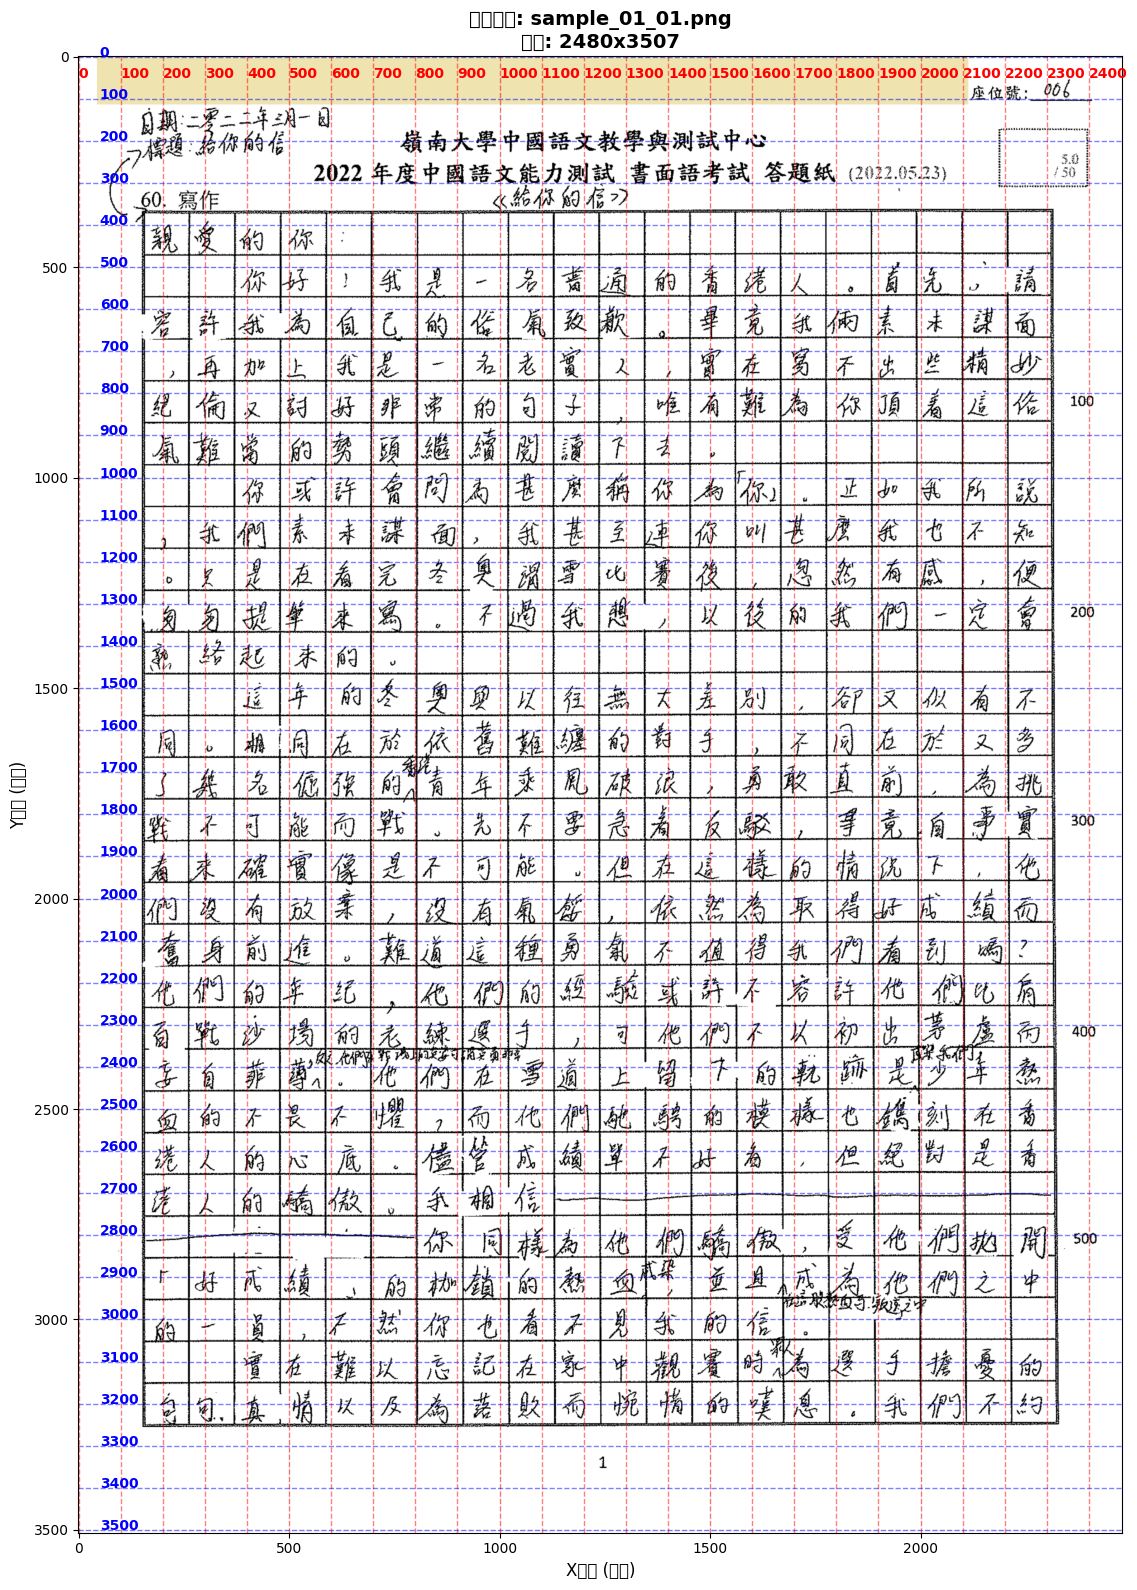


请观察图片,确定作文正文区域的大致坐标:
提示: 忽略页眉、页脚、表格边框、评分栏等非正文内容

请告诉我以下坐标(单位:像素):
  - x_start (左边界)
  - y_start (上边界)
  - x_end (右边界)
  - y_end (下边界)

示例格式: x_start=100, y_start=200, x_end=2300, y_end=3200


In [26]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# 读取测试图片
test_img_path = project_root / 'data' / 'samples' / '2022 第2題 (冬奧) (8份)_Original' / 'sample_01_01.png'
img = Image.open(test_img_path)
img_array = np.array(img)

# 获取图片尺寸
height, width = img_array.shape[:2]
print(f"图片尺寸: {width} x {height} 像素")

# 显示图片
fig, ax = plt.subplots(1, 1, figsize=(12, 16))
ax.imshow(img_array)
ax.set_title(f'测试图片: sample_01_01.png\n尺寸: {width}x{height}', fontsize=14, fontweight='bold')

# 添加网格线帮助定位
ax.grid(True, alpha=0.3, linewidth=0.5)
ax.set_xlabel('X坐标 (像素)', fontsize=12)
ax.set_ylabel('Y坐标 (像素)', fontsize=12)

# 显示主要参考线(每100像素一条)
for x in range(0, width, 100):
    ax.axvline(x=x, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax.text(x, 50, str(x), color='red', fontsize=10, fontweight='bold')

for y in range(0, height, 100):
    ax.axhline(y=y, color='blue', linestyle='--', alpha=0.5, linewidth=1)
    ax.text(50, y, str(y), color='blue', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("请观察图片,确定作文正文区域的大致坐标:")
print("=" * 80)
print("提示: 忽略页眉、页脚、表格边框、评分栏等非正文内容")
print("\n请告诉我以下坐标(单位:像素):")
print("  - x_start (左边界)")
print("  - y_start (上边界)")
print("  - x_end (右边界)")
print("  - y_end (下边界)")
print("\n示例格式: x_start=100, y_start=200, x_end=2300, y_end=3200")

C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\2670817477.py:49: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\2670817477.py:49: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\2670817477.py:49: UserWarning: Glyph 35009 (\N{CJK UNIFIED IDEOGRAPH-88C1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\2670817477.py:49: UserWarning: Glyph 21098 (\N{CJK UNIFIED IDEOGRAPH-526A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\2670817477.py:49: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_48712\2670817477.py:49: UserWarning: Gl

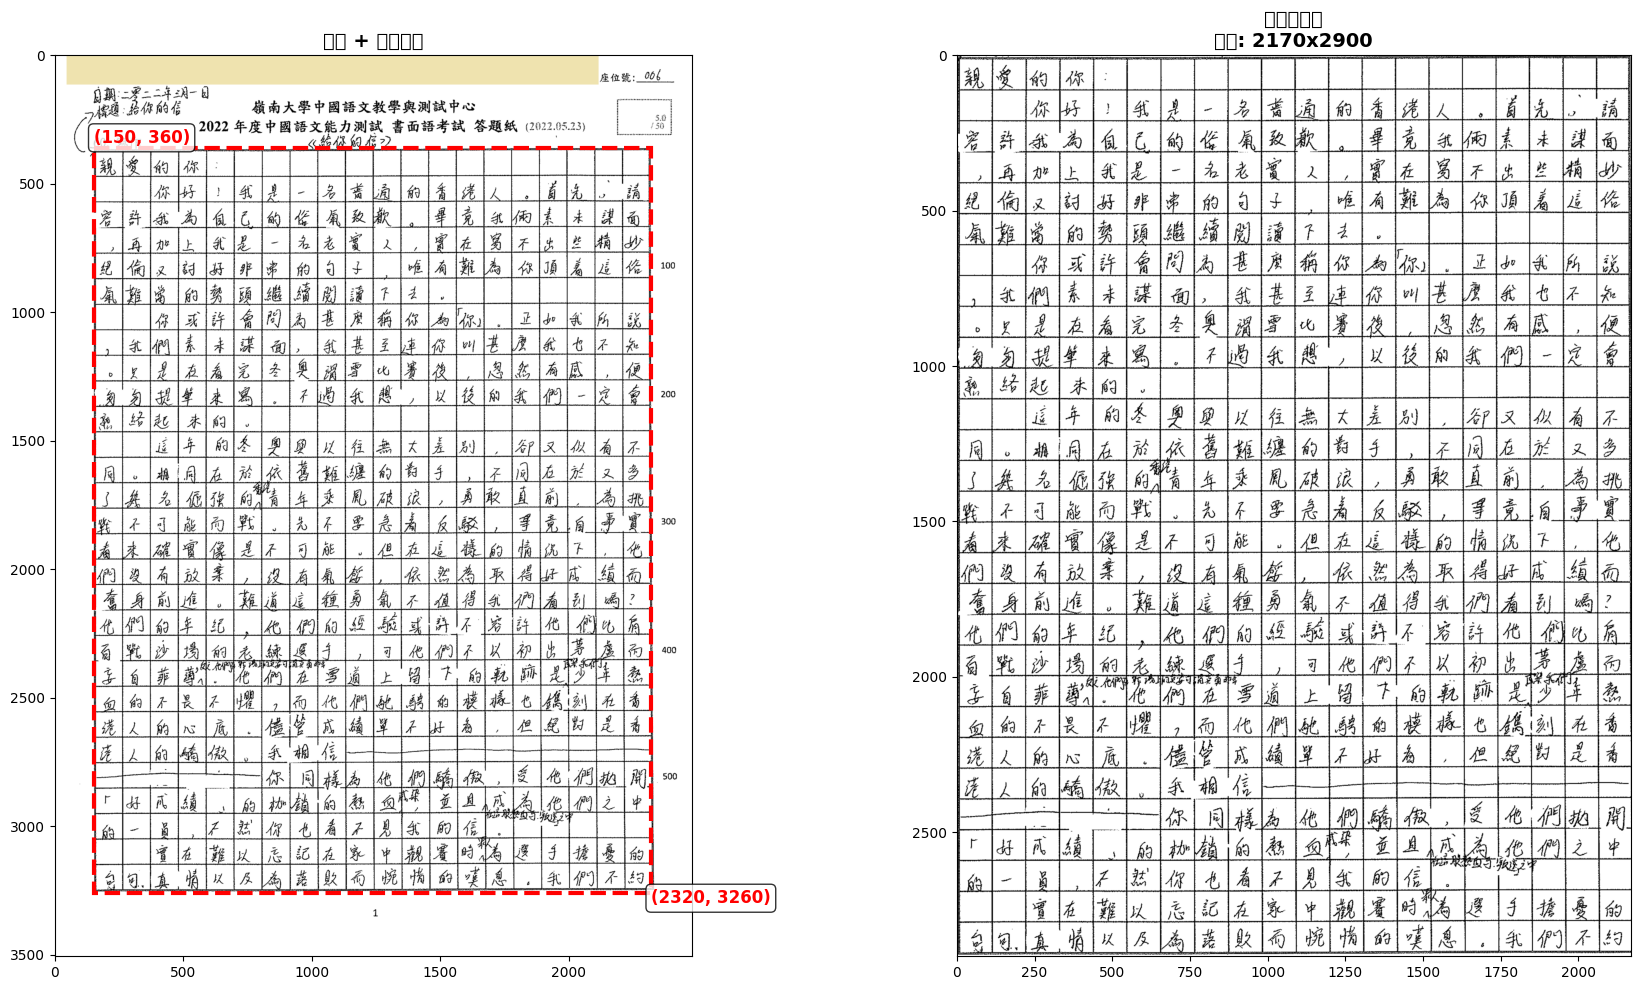


裁剪区域设置:
  左上角: (150, 360)
  右下角: (2320, 3260)
  尺寸: 2170 x 2900 像素

如果区域不准确,请修改上面单元格中的CROP_REGION值并重新运行


: 

In [ ]:
# 交互式区域选择工具
# 在确定坐标后,修改这里的数值并运行

# 【请修改这里的坐标值】
CROP_REGION = {
    'x_start': 150,    # 左边界
    'y_start': 360,    # 上边界  
    'x_end': 2320,     # 右边界
    'y_end': 3260      # 下边界
}

# 预览裁剪区域
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# 左图:原图+裁剪框
ax1.imshow(img_array)
ax1.set_title('原图 + 裁剪区域', fontsize=14, fontweight='bold')

# 绘制裁剪框
rect = patches.Rectangle(
    (CROP_REGION['x_start'], CROP_REGION['y_start']),
    CROP_REGION['x_end'] - CROP_REGION['x_start'],
    CROP_REGION['y_end'] - CROP_REGION['y_start'],
    linewidth=3,
    edgecolor='red',
    facecolor='none',
    linestyle='--'
)
ax1.add_patch(rect)

# 标注坐标
ax1.text(CROP_REGION['x_start'], CROP_REGION['y_start'] - 20, 
         f"({CROP_REGION['x_start']}, {CROP_REGION['y_start']})", 
         color='red', fontsize=12, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax1.text(CROP_REGION['x_end'], CROP_REGION['y_end'] + 40, 
         f"({CROP_REGION['x_end']}, {CROP_REGION['y_end']})", 
         color='red', fontsize=12, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 右图:裁剪后的预览
cropped = img_array[
    CROP_REGION['y_start']:CROP_REGION['y_end'],
    CROP_REGION['x_start']:CROP_REGION['x_end']
]
ax2.imshow(cropped)
crop_height = CROP_REGION['y_end'] - CROP_REGION['y_start']
crop_width = CROP_REGION['x_end'] - CROP_REGION['x_start']
ax2.set_title(f'裁剪后预览\n尺寸: {crop_width}x{crop_height}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n裁剪区域设置:")
print(f"  左上角: ({CROP_REGION['x_start']}, {CROP_REGION['y_start']})")
print(f"  右下角: ({CROP_REGION['x_end']}, {CROP_REGION['y_end']})")
print(f"  尺寸: {crop_width} x {crop_height} 像素")
print(f"\n如果区域不准确,请修改上面单元格中的CROP_REGION值并重新运行")